In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Proyecto integrado

## Nivel de éxito de videojuegos en distintas plataformas en el año 2016

### 1. Preparación de los datos 


Primero leemos y analizamos los tipos de datos que tenemos, los nombres de las calumnas y valores que contienen.

In [2]:
games = pd.read_csv("games.csv") #leemos el archivo

In [3]:
games.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Nos encontramos con 3 columnas cuyos valores ausentes son significativos, ya que son una gran proporsión de los valores totales. Se requiere analizar a qué están ligados antes de saber cómo tratarlos, dado que son datos categóricos su tratamiento se realizará más adelante para continuar con el análisis de ventas.

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

Hacemos las modificaciones necesarias a los datos. Agregamos una columna con formato fecha para el año de lanzamiento sin eliminar la columan existente ya que podremos utilizar el tipo de datos flotantes más adelante. Modificaremos los nombres de las columnas a minúsculas para cumplir con la estructura. Crearemos una columna con el user score como flotante sin eliminar la anterior como respaldo, para lo que será necesario respetar los datos que están por procesar (tbd) ya que no conviene elimianrlos.

In [7]:
games["Year_Date"] = pd.to_datetime(games["Year_of_Release"], format="%Y") #creamos una columna con el formato fecha para el año de lanzamiento.

In [8]:
games.columns = games.columns.str.lower() #cambiamos los nombres a minúsculas

En el caso de datos tbd haremos un filtrado, los que cumplen la condición de ser tbd se asignaran como valores negativos para no eliminarlos ni tomarlos como nulos, sin embargo, a la hora de hacer cálculos hay que considerar que los valores pueden verse afectados pro esto. Se tomará en cuenta el rango real de los números para no afectarse por los nuevos negativos. Los valores reales o "completos" se asignarán a una nueva columna llamada user_score_new.

In [9]:
#Nueva columna de user score como flotante
games["user_score_new"] = np.where(
    #se asigna negativo a los datos que estén por procesarlo identificando que es por determinarse, 
    # sin embargo al momento de calcular un promedio se descartarían los valores negativos que pudieran afectar.
    games["user_score"] == "tbd",
    -1,
    games["user_score"]
)
games["user_score_new"] = games["user_score_new"].astype("float")


In [11]:
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

### 2. Análisis de datos

¿Los datos son significativos en cada periodo? Graficaremos los lanzamientos agrupándolos por año para distinguir los periodos más relevantes

<Axes: xlabel='year_date'>

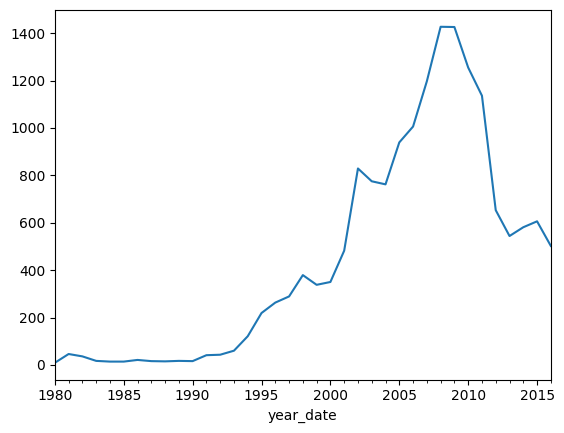

In [12]:
games.groupby("year_date")["name"].count().plot(kind="line") #agrupamos y graficamos

Dado que antes del 1993 los lanzamientos no son muchos y no parecen afectar la tendencia posterios ni las deciciones que puedan tomarse para el 2017, podemos filtrarlos de nuestro análisis. Hay una tendencia positiva hasta 2008, y posteriormente hay un declive en lacantidad de lanzamientos.